In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
#from keras_layer_normalization import LayerNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
#from tensorflow.keras.layers import LayerNormalization

# supress deprecation warnings from TF
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yanjia/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework

In [3]:
##############  read the train data and test data ##################################

In [4]:
train_set=read_csv('data/train_set.csv')
val_set=read_csv('data/val_set.csv')
test_set=read_csv('data/test_set.csv')

In [5]:
trainy=read_csv('data/trainy.csv')
valy=read_csv('data/valy.csv')
testy=read_csv('data/testy.csv')

In [6]:
df = read_csv('data/orginal_data.csv')

In [7]:
# make the range between 0 and 1
column = list(train_set.columns.values)
for col in column:
    minimum = df[col].min()
    maximum = df[col].max()
    train_set[col] = (train_set[col] - minimum)/(maximum-minimum)
    val_set[col] = (val_set[col] - minimum)/(maximum-minimum)
    test_set[col] = (test_set[col] - minimum)/(maximum-minimum)

In [8]:
train_set.head()

,Admittype,Ethnicity,Gender,Age,Admission Weight (Kg),Heart Rate,Respiratory Rate,O2 saturation pulseoxymetry,Inspired O2 Fraction,PEEP set,...,Peak Insp. Pressure,O2 Flow,Plateau Pressure,Arterial O2 pressure,Arterial CO2 Pressure,Arterial Blood Pressure systolic,Arterial Blood Pressure diastolic,Arterial Blood Pressure mean,SBT_value,ventilator_category
0,1.0,0.0,0.0,0.165179,0.567901,0.289308,0.128571,1.0,0.4,0.333333,...,0.612903,0.12,0.53125,0.289604,0.58209,0.268908,0.214953,0.154070,0.5,0.136364
1,1.0,0.0,0.0,0.165179,0.567901,0.210692,0.125000,1.0,0.4,0.333333,...,0.612903,0.12,0.53125,0.289604,0.58209,0.268908,0.214953,0.154070,0.5,0.136364
2,1.0,0.0,0.0,0.165179,0.567901,0.226415,0.128571,1.0,0.4,0.333333,...,0.612903,0.12,0.53125,0.289604,0.58209,0.268908,0.214953,0.154070,0.5,0.136364
3,1.0,0.0,0.0,0.165179,0.567901,0.257862,0.128571,1.0,0.4,0.333333,...,0.612903,0.12,0.53125,0.289604,0.58209,0.331933,0.242991,0.188953,0.5,0.136364
4,1.0,0.0,0.0,0.165179,0.567901,0.232704,0.128571,1.0,0.4,0.333333,...,0.548387,0.12,0.53125,0.289604,0.58209,0.184874,0.210280,0.142442,0.5,0.136364


In [9]:
train_set = train_set.values
val_set = val_set.values
test_set = test_set.values

In [10]:
train_set = np.reshape(train_set, (train_set.shape[0],train_set.shape[1],1))

In [11]:
val_set = np.reshape(val_set, (val_set.shape[0],val_set.shape[1],1))

In [12]:
test_set = np.reshape(test_set, (test_set.shape[0],test_set.shape[1],1))

In [13]:
sess = tf.InteractiveSession()

In [14]:
len(train_set[0])

25

In [15]:
zero = trainy[trainy['Vented_1']==0]
one = trainy[trainy['Vented_1']==1]

In [16]:
zero.shape, one.shape, trainy.shape

((42685, 1), (133291, 1), (175976, 1))

In [17]:
#cnn model input_shape=25*1
import time
start_time = time.time()

n_timesteps, n_features, n_outputs = 1, 25, 1
epochs, batch_size = 50, 128
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu',  kernel_regularizer= l2(0.0005), input_shape=(n_features, n_timesteps)))
cnn_model.add(Conv1D(filters=128, kernel_size=1, activation='relu',  kernel_regularizer= l2(0.0005)))
cnn_model.add(Conv1D(filters=256, kernel_size=1, activation='relu', kernel_regularizer= l2(0.0005)))
#cnn_model.add(BatchNormalization())
cnn_model.add(Conv1D(filters=256, kernel_size=1, activation='relu', kernel_regularizer= l2(0.0005)))
#cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
#cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model.add(Dense(n_outputs, activation='sigmoid'))

def schedule(epoch):
    if epoch<=10:
        return 1e-2
    elif epoch<= 20:
        return 1e-3
    elif epoch<=40:
        return 1e-4
    else:
        return 1e-5

lr_schedule= LearningRateScheduler(schedule)
class_weight = {0: 3.,
                1: 1.}

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_model.fit(train_set, trainy, validation_data=(val_set, valy), epochs=epochs, batch_size=batch_size, 
                    shuffle=True, callbacks=[lr_schedule], class_weight=class_weight, verbose=1)

elapsed_time = time.time() - start_time
print(elapsed_time, 'seconds')

Train on 175976 samples, validate on 24531 samples
Epoch 1/50
175976/175976 [==============================] - 28s 157us/sample - loss: 0.7132 - acc: 0.7977 - val_loss: 0.3785 - val_acc: 0.8489
Epoch 2/50
175976/175976 [==============================] - 30s 170us/sample - loss: 0.6463 - acc: 0.8180 - val_loss: 0.3671 - val_acc: 0.8600
Epoch 3/50
175976/175976 [==============================] - 32s 179us/sample - loss: 0.6296 - acc: 0.8281 - val_loss: 0.3499 - val_acc: 0.8773
Epoch 4/50
175976/175976 [==============================] - 32s 184us/sample - loss: 0.6200 - acc: 0.8321 - val_loss: 0.4041 - val_acc: 0.8464
Epoch 5/50
175976/175976 [==============================] - 33s 189us/sample - loss: 0.6100 - acc: 0.8356 - val_loss: 0.3473 - val_acc: 0.8863
Epoch 6/50
175976/175976 [==============================] - 33s 189us/sample - loss: 0.6077 - acc: 0.8363 - val_loss: 0.3538 - val_acc: 0.8676
Epoch 7/50
175976/175976 [==============================] - 34s 193us/sample - loss: 0.6048

KeyboardInterrupt: 

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 25, 64)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 128)           8320      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 25, 256)           33024     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 25, 256)           65792     
_________________________________________________________________
dropout (Dropout)            (None, 25, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

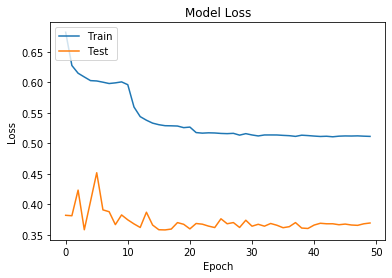

In [144]:
# plot train and val loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# evaluate model
_, accuracy_test = cnn_model.evaluate(test_set, testy, batch_size=batch_size, verbose=1)

19584/19584 [==============================] - 1s 63us/sample - loss: 0.3456 - acc: 0.8648


Using TensorFlow backend.


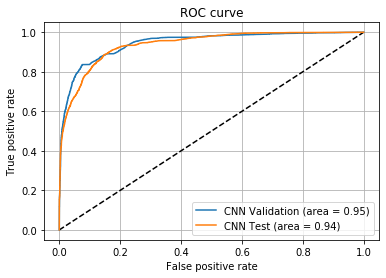

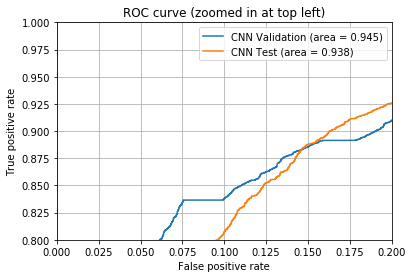

In [23]:
#import glob
import matplotlib.pyplot as plt
#import cv2
import pandas as pd

import numpy as np
from sklearn.metrics import roc_curve, auc

#import models
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint



y_pred_val = cnn_model.predict(val_set)
y_pred_val = y_pred_val.ravel()
y_true_val = valy.values.ravel()
fpr_val, tpr_val, thresholds_val = roc_curve(y_true_val, y_pred_val)
auc_val = auc(fpr_val, tpr_val)


y_pred_test = cnn_model.predict(test_set)
y_pred_test = y_pred_test.ravel()
y_true_test = testy.values.ravel()
fpr_test, tpr_test, thresholds_test = roc_curve(y_true_test, y_pred_test)
auc_test = auc(fpr_test, tpr_test)

modelname = 'cnn_l2'

plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_focusnet, tpr_focusnet, label= 'U-net (area = {:.3f})'.format(auc_focusnet))
#plt.plot(fpr_attn_unet, tpr_attn_unet, label= 'U-net++ (area = {:.3f})'.format(auc_attn_unet))
plt.plot(fpr_val, tpr_val, label= 'CNN Validation (area = {:.2f})'.format(auc_val))
plt.plot(fpr_test, tpr_test, label= 'CNN Test (area = {:.2f})'.format(auc_test))
#plt.plot(fpr_wide_unet, tpr_wide_unet, label= 'FocusnetAlpha1 (area = {:.3f})'.format(auc_wide_unet))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.grid()
plt.legend(loc='best')
plt.show()
plt.savefig(modelname + '_auc.png')

plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_focusnet, tpr_focusnet, label= 'U-net (area = {:.3f})'.format(auc_focusnet))
#plt.plot(fpr_attn_unet, tpr_attn_unet, label= 'U-net++ (area = {:.3f})'.format(auc_attn_unet))
plt.plot(fpr_val, tpr_val, label= 'CNN Validation (area = {:.3f})'.format(auc_val))
plt.plot(fpr_test, tpr_test, label= 'CNN Test (area = {:.3f})'.format(auc_test))
#plt.plot(fpr_wide_unet, tpr_wide_unet, label= 'FocusnetAlpha1 (area = {:.3f})'.format(auc_wide_unet))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.grid()
plt.legend(loc='best')
plt.show()

In [24]:
from sklearn.metrics import classification_report

In [25]:
target_names = ['class 0', 'class 1']
y_pred_val[y_pred_val>0.5] = 1
y_pred_val[y_pred_val<=0.5] = 0
y_pred_test[y_pred_test>0.5] = 1
y_pred_test[y_pred_test<=0.5] = 0

In [26]:
print(classification_report(valy.values, y_pred_val, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.89      0.76      6001
     class 1       0.96      0.85      0.90     18530

    accuracy                           0.86     24531
   macro avg       0.81      0.87      0.83     24531
weighted avg       0.89      0.86      0.87     24531



In [27]:
print(classification_report(testy.values, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.86      0.77      5051
     class 1       0.95      0.87      0.90     14533

    accuracy                           0.86     19584
   macro avg       0.82      0.86      0.84     19584
weighted avg       0.88      0.86      0.87     19584



In [28]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(testy.values, y_pred_test, average='micro')

(0.8648386437908496, 0.8648386437908496, 0.8648386437908496, None)

In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import time

space = {
    'regularize' : hp.uniform('regularize', 0.00001, 0.001)
    #'filters' : hp.choice('filters', [32, 64, 128, 256]),
    }

def evluate_model(space):
    #cnn model input_shape=25*1
    
    regularize = space['regularize']
    #filters = space['filters']
    n_timesteps, n_features, n_outputs = 1, 25, 1
    epochs, batch_size = 30, 256
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu',  kernel_regularizer= l2(regularize), input_shape=(n_features, n_timesteps)))
    cnn_model.add(Conv1D(filters=128, kernel_size=1, activation='relu',  kernel_regularizer= l2(regularize)))
    cnn_model.add(Conv1D(filters=256, kernel_size=1, activation='relu', kernel_regularizer= l2(regularize)))
    #cnn_model.add(BatchNormalization())
    cnn_model.add(Conv1D(filters=256, kernel_size=1, activation='relu', kernel_regularizer= l2(regularize)))
    #cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.5))
    #cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(regularize)))
    cnn_model.add(Dense(n_outputs, activation='sigmoid'))

    def schedule(epoch):
        if epoch<=10:
            return 1e-2
        elif epoch<=20:
            return 1e-3
        elif epoch<=40:
            return 1e-4
        else:
            return 1e-5

    lr_schedule= LearningRateScheduler(schedule)
    class_weight = {0: 4.,
                    1: 1.}

    cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = cnn_model.fit(train_set, trainy, validation_data=(val_set, valy), epochs=epochs, batch_size=batch_size, 
                    shuffle=True, callbacks=[lr_schedule],  class_weight=class_weight, verbose=0)
    _, accuracy = cnn_model.evaluate(test_set, testy, batch_size=batch_size, verbose=0)   
    return accuracy

trials = Trials()
start_time = time.time()
best= fmin(fn=evluate_model, space=space, algo=tpe.suggest, max_evals=20, trials=trials)
elapsed_time = time.time() - start_time
print('best: {}'.format(best))
print(elapsed_time, 'hours')

In [139]:
cnn_model.save("final_model/keras2_conv1d.h5")

In [140]:
model_json = cnn_model.to_json()
with open("final_model/keras2_conv1d.json", "w") as json_file:
    json_file.write(model_json)